# Import the necessary libaraies

In [1]:
import pandas as pd
import gc 
import warnings
import numpy as np
from datetime import timedelta
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
outputfilepath = r"F:\Ads_projects\project1\mast30034_2021_s2_project_1-junzhin\data\2020\yellow_taxi_2020\yellow_2020_preprocessed.feather"
file_path = r'F:\Ads_projects\project1\mast30034_2021_s2_project_1-junzhin\data\2020\yellow_taxi_2020'

# 1. Open the relevant datasets in 2020 from the feather files

In [2]:
file_name = f'\yellow_tripdata_2020-01.feather'
yellow_01df = pd.read_feather(file_path + file_name)   
file_name = f'\yellow_tripdata_2020-02.feather'
yellow_02df = pd.read_feather(file_path + file_name) 
file_name = f'\yellow_tripdata_2020-03.feather'
yellow_03df = pd.read_feather(file_path + file_name) 
file_name = f'\yellow_tripdata_2020-04.feather'
yellow_04df = pd.read_feather(file_path + file_name) 

file_name = f'\yellow_tripdata_2020-05.feather'
yellow_05df = pd.read_feather(file_path + file_name) 

file_name = f'\yellow_tripdata_2020-06.feather'
yellow_06df = pd.read_feather(file_path + file_name) 

file_name = f'\yellow_tripdata_2020-07.feather'
yellow_07df = pd.read_feather(file_path + file_name) 

file_name = f'\yellow_tripdata_2020-08.feather'
yellow_08df = pd.read_feather(file_path + file_name) 

file_name = f'\yellow_tripdata_2020-09.feather'
yellow_09df = pd.read_feather(file_path + file_name) 


file_name = f'\yellow_tripdata_2020-10.feather'
yellow_10df = pd.read_feather(file_path + file_name)
                              
file_name = f'\yellow_tripdata_2020-11.feather'
yellow_11df = pd.read_feather(file_path + file_name)
                              
file_name = f'\yellow_tripdata_2020-12.feather'
yellow_12df = pd.read_feather(file_path + file_name)

yellow_df = pd.concat([yellow_01df,yellow_02df,yellow_03df,yellow_04df,yellow_05df,yellow_06df,yellow_07df,\
                       yellow_08df,yellow_09df,yellow_10df,yellow_11df,yellow_12df],axis = 0)



In [3]:
del yellow_01df
del yellow_02df
                              
del yellow_03df
del yellow_04df
                              
del yellow_05df
del yellow_06df
                              
del yellow_07df
del yellow_08df
                              
del yellow_09df
del yellow_10df
                              
del yellow_11df
del yellow_12df



In [4]:
yellow_df.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

# 2. Data Cleaning

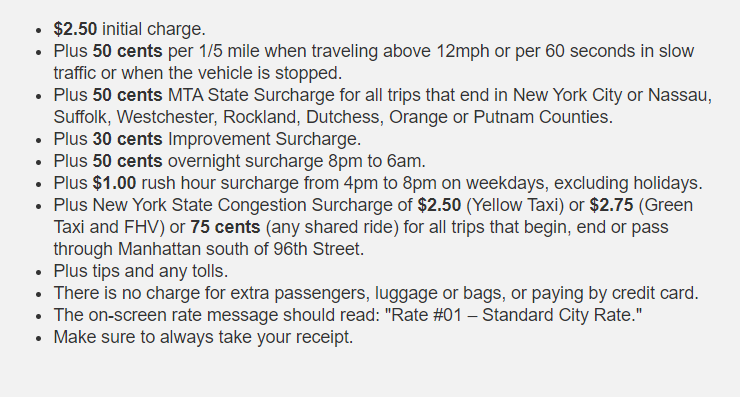

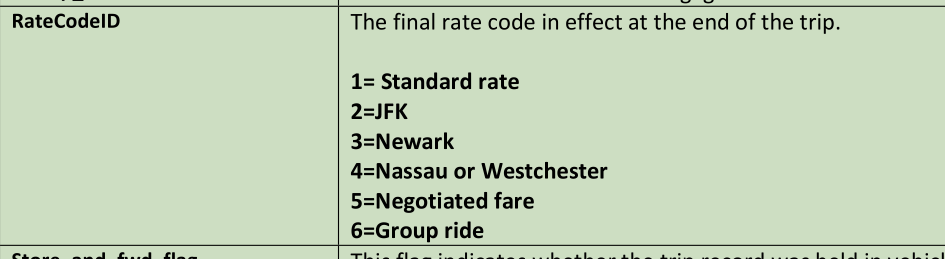

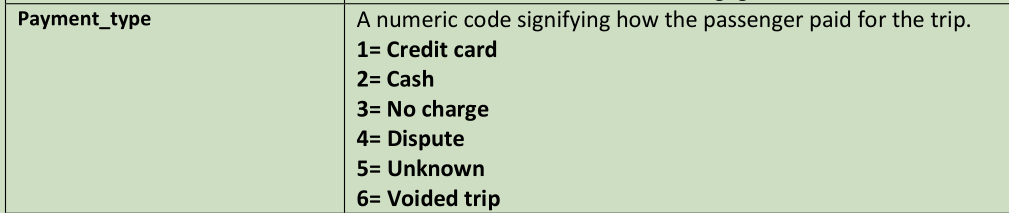

In [5]:
# passenger_count is supposed to be bewteen 1 and 7
# invalid payment type 3,4,5
#  the minium tip amout(credit card) is above 0
#  the minium fare amout is above 2.5 
#  the minium total amout is above 2.5 
#  the total distance is above 0
yellow_df_new = yellow_df.loc[(yellow_df["passenger_count"] != 0)& (yellow_df["passenger_count"] <= 7)&(yellow_df["payment_type"] != 3)  & (yellow_df["fare_amount"] >=2.5) & (yellow_df["tip_amount"] > 0)& (yellow_df["total_amount"] >=2.5) &(yellow_df["trip_distance"] > 0)  ,:].sort_values("passenger_count")
del yellow_df
yellow_df  = yellow_df_new
yellow_df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0.0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1892807,1892807.0,1.0,2020-03-10 10:18:44,2020-03-10 10:28:43,1.0,1.10,1.0,N,161,186,1.0,7.5,2.5,0.5,2.15,0.0,0.3,12.95,2.5
1892808,1892808.0,1.0,2020-03-10 10:51:05,2020-03-10 11:03:32,1.0,0.50,1.0,N,186,100,1.0,8.5,2.5,0.5,2.35,0.0,0.3,14.15,2.5
1892809,1892809.0,2.0,2020-03-10 10:32:28,2020-03-10 10:47:37,1.0,3.74,1.0,N,261,246,1.0,14.5,0.0,0.5,3.56,0.0,0.3,21.36,2.5
1892810,1892810.0,2.0,2020-03-10 10:08:37,2020-03-10 10:32:14,1.0,2.36,1.0,N,239,170,1.0,15.5,0.0,0.5,4.70,0.0,0.3,23.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868056,NaN,1.0,2020-02-09 16:51:54,2020-02-09 17:04:34,7.0,1.30,1.0,N,234,164,1.0,9.0,2.5,0.5,2.45,0.0,0.3,14.75,2.5
748330,748330.0,2.0,2020-03-04 18:57:23,2020-03-04 18:57:27,7.0,0.07,5.0,N,264,264,1.0,75.5,0.0,0.5,19.08,0.0,0.3,95.38,0.0
823304,823304.0,2.0,2020-01-05 18:23:33,2020-01-05 19:10:26,7.0,18.41,5.0,N,132,87,1.0,72.0,0.0,0.5,15.06,0.0,0.3,90.36,2.5
5444337,NaN,1.0,2020-02-26 18:51:09,2020-02-26 19:14:51,7.0,6.00,1.0,N,261,143,1.0,21.5,3.5,0.5,5.15,0.0,0.3,30.95,2.5


# 3 Remove not_interested features

In [6]:
yellow_df_new = yellow_df.drop(['VendorID','store_and_fwd_flag','congestion_surcharge','improvement_surcharge','tolls_amount','mta_tax','extra','RatecodeID','payment_type'], axis=1)
del yellow_df
yellow_df  = yellow_df_new

# 4. Removing the extreme values or Outliers

In [7]:
yellow_df.columns

Index(['index', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'tip_amount', 'total_amount'],
      dtype='object')

# Save the clean data and Reopen it again 

In [8]:
yellow_df_new = yellow_df.drop(['index'], axis=1)
del yellow_df
yellow_df  = yellow_df_new

In [9]:
yellow_df.reset_index().to_feather(outputfilepath)

In [10]:
del yellow_df
gc.collect()

19

In [11]:
yellow_df = pd.read_feather(outputfilepath)

# Common groupings

In [12]:
trip_info = ["passenger_count"]
amount = ["tip_amount","fare_amount","total_amount"]
distance_and_time =["tpep_pickup_datetime","tpep_dropoff_datetime","trip_distance"]
location = ["PULocationID","DOLocationID"]

# Examining the distributions of attributes

<AxesSubplot:>

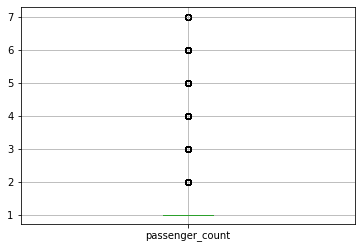

In [13]:
yellow_df.boxplot(column =trip_info)

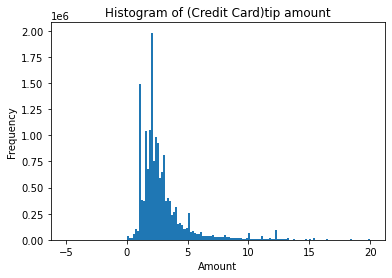

In [14]:
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title(r'Histogram of (Credit Card)tip amount')
m1 = plt.hist(np.array(yellow_df[ 'tip_amount']), bins=150, range = (-5,20))

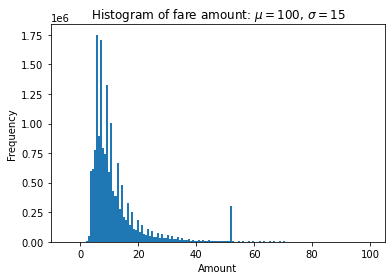

In [15]:
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title(r'Histogram of fare amount: $\mu=100$, $\sigma=15$')
m2 = plt.hist(np.array(yellow_df[ 'fare_amount']), bins=150, range = (-5,100))

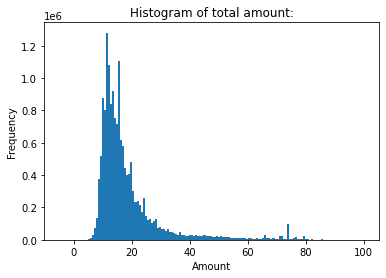

In [16]:
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title(r'Histogram of total amount:')
m3 = plt.hist(np.array(yellow_df[ 'total_amount']), bins=150, range = (-5,100))

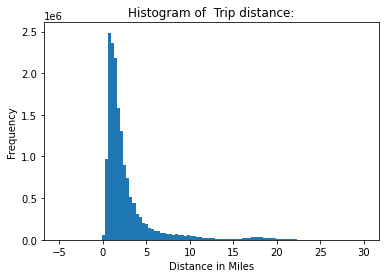

In [17]:
plt.xlabel('Distance in Miles')
plt.ylabel('Frequency')
plt.title(r'Histogram of  Trip distance:')
m3 = plt.hist(np.array(yellow_df[ 'trip_distance']), bins=100, range = (-5,30))

In [18]:
# location ID should be around 1 and 263 , 264 and 265 are unknown location ID, it shoud be remove!
yellow_df.describe()[location]

,PULocationID,DOLocationID
count,1.637203e+07,1.637203e+07
mean,1.669764e+02,1.646003e+02
std,6.544971e+01,6.965545e+01
min,1.000000e+00,1.000000e+00
25%,1.320000e+02,1.130000e+02
50%,1.620000e+02,1.620000e+02
75%,2.340000e+02,2.360000e+02
max,2.650000e+02,2.650000e+02


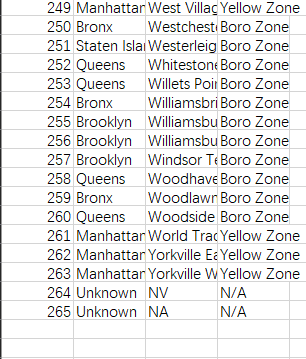

In [19]:
yellow_df.loc[(yellow_df['PULocationID'] == 264) | (yellow_df['PULocationID'] == 264),:]

,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount
308,1893268,2020-03-10 10:16:59,2020-03-10 10:24:20,1.0,0.70,264,48,6.0,2.30,11.60
503,1892112,2020-03-10 10:37:58,2020-03-10 10:51:28,1.0,3.90,264,186,15.0,0.50,18.80
1134,1894826,2020-03-10 10:46:57,2020-03-10 10:50:36,1.0,0.40,264,239,4.5,1.55,9.35
1495,1893461,2020-03-10 10:34:05,2020-03-10 11:00:12,1.0,5.44,264,88,21.5,4.96,29.76
1549,1893956,2020-03-10 10:05:12,2020-03-10 10:16:57,1.0,0.20,264,45,8.5,1.50,13.30
...,...,...,...,...,...,...,...,...,...,...
16371866,519238,2020-01-04 01:19:35,2020-01-04 01:48:06,6.0,17.75,264,264,52.0,12.28,73.70
16371899,1513016,2020-03-08 00:47:35,2020-03-08 00:53:00,6.0,0.84,264,264,5.5,1.00,10.30
16372016,1571549,2020-01-09 16:16:44,2020-01-09 16:16:47,7.0,0.58,264,264,76.0,10.00,86.80
16372024,2596638,2020-02-13 00:00:47,2020-02-13 00:01:40,7.0,0.18,264,264,71.0,14.26,85.56


# Checking the 0.99 quantile  of numeric attributes

In [20]:
yellow_df[amount].quantile(.99)

tip_amount      12.28
fare_amount     52.00
total_amount    73.70
Name: 0.99, dtype: float64

In [21]:
# Remove the tip_amount       above $12.28
# Remove the fare_amount  above $52.00
# Remove the total_amount above $73.70
# Remove the Location ID of 264 and 265
yellow_df_new = yellow_df.loc[(yellow_df["tip_amount"] <  12.28)& (yellow_df["fare_amount"] <= 52)&\
(yellow_df["total_amount"] <= 73.65) & (yellow_df["PULocationID"] !=264) & (yellow_df["PULocationID"] != 265) &\
                              (yellow_df["DOLocationID"] !=264) & (yellow_df["DOLocationID"] != 265)   ,:].sort_values("passenger_count")
del yellow_df
yellow_df  = yellow_df_new

In [22]:
yellow_df.head(10)

,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount
0,0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,238,239,6.0,1.47,11.27
8191985,6334530,2020-01-31 23:32:05,2020-01-31 23:50:18,1.0,3.84,231,181,14.5,3.66,21.96
8191986,6334531,2020-01-31 23:25:52,2020-01-31 23:32:07,1.0,1.16,249,79,6.0,1.96,11.76
8191987,6334533,2020-01-31 23:44:54,2020-02-01 00:00:53,1.0,4.90,162,87,16.5,5.08,25.38
8191988,6334534,2020-01-31 23:05:32,2020-01-31 23:11:59,1.0,1.04,162,230,6.5,2.06,12.36
8191989,6334535,2020-01-31 23:19:15,2020-01-31 23:33:16,1.0,1.82,48,164,10.0,3.45,17.25
8191990,6334536,2020-01-31 23:51:53,2020-01-31 23:55:15,1.0,0.85,114,234,5.0,1.76,10.56
8191991,6334537,2020-01-31 23:57:57,2020-02-01 00:04:32,1.0,1.16,234,68,6.5,2.06,12.36
8191992,6334538,2020-01-31 23:04:04,2020-01-31 23:11:25,1.0,1.22,236,239,7.0,1.00,11.80
8191984,6334529,2020-01-31 23:56:58,2020-02-01 00:08:28,1.0,2.70,68,13,11.0,2.95,17.75


In [23]:
#  generating the formatted datatime for pickup and dropoff
yellow_df['pick_date_time'] = pd.to_datetime(yellow_df['tpep_pickup_datetime'], utc=True)
yellow_df['drop_date_time'] = pd.to_datetime(yellow_df['tpep_dropoff_datetime'], utc=True)

In [24]:
# Remove any times before 2020/01
yellow_df_new = yellow_df.loc[(yellow_df["pick_date_time"] >= '2020-01-01') &(yellow_df["drop_date_time"] >= '2020-01-01 ') \
                              & (yellow_df["pick_date_time"] <= '2020-12-31') &(yellow_df["drop_date_time"] <= '2021-01-01 '),:]
yellow_df_new = yellow_df_new.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
del yellow_df
yellow_df  = yellow_df_new

# Save the file to feather again

In [25]:

yellow_df
yellow_df_new = yellow_df.drop(['index'],axis = 1)
del yellow_df
yellow_df = yellow_df_new

In [26]:
yellow_df.reset_index().to_feather(outputfilepath)
del yellow_df

In [27]:
yellow_df = pd.read_feather(outputfilepath)
yellow_df.head(10)

,index,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,pick_date_time,drop_date_time
0,0,1.0,1.20,238,239,6.0,1.47,11.27,2020-01-01 00:28:15+00:00,2020-01-01 00:33:03+00:00
1,8191985,1.0,3.84,231,181,14.5,3.66,21.96,2020-01-31 23:32:05+00:00,2020-01-31 23:50:18+00:00
2,8191986,1.0,1.16,249,79,6.0,1.96,11.76,2020-01-31 23:25:52+00:00,2020-01-31 23:32:07+00:00
3,8191987,1.0,4.90,162,87,16.5,5.08,25.38,2020-01-31 23:44:54+00:00,2020-02-01 00:00:53+00:00
4,8191988,1.0,1.04,162,230,6.5,2.06,12.36,2020-01-31 23:05:32+00:00,2020-01-31 23:11:59+00:00
5,8191989,1.0,1.82,48,164,10.0,3.45,17.25,2020-01-31 23:19:15+00:00,2020-01-31 23:33:16+00:00
6,8191990,1.0,0.85,114,234,5.0,1.76,10.56,2020-01-31 23:51:53+00:00,2020-01-31 23:55:15+00:00
7,8191991,1.0,1.16,234,68,6.5,2.06,12.36,2020-01-31 23:57:57+00:00,2020-02-01 00:04:32+00:00
8,8191992,1.0,1.22,236,239,7.0,1.00,11.80,2020-01-31 23:04:04+00:00,2020-01-31 23:11:25+00:00
9,8191984,1.0,2.70,68,13,11.0,2.95,17.75,2020-01-31 23:56:58+00:00,2020-02-01 00:08:28+00:00


# Checking the missing values of existing columns in the dataframe

In [28]:
yellow_df.isnull().sum()
# The dataset is perfect and there is not any missing values

index              0
passenger_count    0
trip_distance      0
PULocationID       0
DOLocationID       0
fare_amount        0
tip_amount         0
total_amount       0
pick_date_time     0
drop_date_time     0
dtype: int64

# 5. Feature Engineering

In [29]:
# Create the travel duration
yellow_df['travel_duration'] = yellow_df['drop_date_time'] - yellow_df['pick_date_time']

In [30]:
yellow_df['travel_duration'].quantile(.99)

Timedelta('0 days 00:42:48')

In [31]:
# Remove any travel duration is more than  50 minutes by checking its 0.99 quantiles
yellow_df_new = yellow_df.loc[(yellow_df['travel_duration'] < '0 days 00:50:01'),:]
del yellow_df
yellow_df = yellow_df_new
yellow_df.head(10)

,index,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,pick_date_time,drop_date_time,travel_duration
0,0,1.0,1.20,238,239,6.0,1.47,11.27,2020-01-01 00:28:15+00:00,2020-01-01 00:33:03+00:00,0 days 00:04:48
1,8191985,1.0,3.84,231,181,14.5,3.66,21.96,2020-01-31 23:32:05+00:00,2020-01-31 23:50:18+00:00,0 days 00:18:13
2,8191986,1.0,1.16,249,79,6.0,1.96,11.76,2020-01-31 23:25:52+00:00,2020-01-31 23:32:07+00:00,0 days 00:06:15
3,8191987,1.0,4.90,162,87,16.5,5.08,25.38,2020-01-31 23:44:54+00:00,2020-02-01 00:00:53+00:00,0 days 00:15:59
4,8191988,1.0,1.04,162,230,6.5,2.06,12.36,2020-01-31 23:05:32+00:00,2020-01-31 23:11:59+00:00,0 days 00:06:27
5,8191989,1.0,1.82,48,164,10.0,3.45,17.25,2020-01-31 23:19:15+00:00,2020-01-31 23:33:16+00:00,0 days 00:14:01
6,8191990,1.0,0.85,114,234,5.0,1.76,10.56,2020-01-31 23:51:53+00:00,2020-01-31 23:55:15+00:00,0 days 00:03:22
7,8191991,1.0,1.16,234,68,6.5,2.06,12.36,2020-01-31 23:57:57+00:00,2020-02-01 00:04:32+00:00,0 days 00:06:35
8,8191992,1.0,1.22,236,239,7.0,1.00,11.80,2020-01-31 23:04:04+00:00,2020-01-31 23:11:25+00:00,0 days 00:07:21
9,8191984,1.0,2.70,68,13,11.0,2.95,17.75,2020-01-31 23:56:58+00:00,2020-02-01 00:08:28+00:00,0 days 00:11:30


In [32]:
# Create the avarege speed and conversion time (mile/hour)
yellow_df['average_speed'] = yellow_df['trip_distance'] /(yellow_df['travel_duration']/ timedelta (hours=1))

In [33]:
# Create the avarege fare per mile
yellow_df['average_fare'] = yellow_df['fare_amount'] / yellow_df['trip_distance']

In [34]:
# Create the ratop between tip amount and fare amount
yellow_df['tip_fare_r'] = yellow_df['tip_amount'] / yellow_df['fare_amount']

# 6.  Save the cleaned dataset

In [35]:
yellow_df.reset_index().to_feather(outputfilepath)
del yellow_df

In [36]:
gc.collect()

14106

# 6. Open up other datasets and Do preprocessing

In [37]:
Income_df =  pd.read_csv(f'F:\Ads_projects\project1\mast30034_2021_s2_project_1-junzhin\data\income_2019.csv')

## 6.1 "Income" dataset

In [38]:
Income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Borough        5 non-null      object
 1   Median Income  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [39]:
Income_df.head(10)

,Borough,Median Income
0,Manhattan,86553
1,Bronx,40088
2,Queens,68666
3,Brooklyn,60231
4,Staten Island,82783


## 6.2 "Shooting" Datasets

In [40]:
shooting_df =pd.read_csv(f"F:\Ads_projects\project1\mast30034_2021_s2_project_1-junzhin\data\Crime_and_protest\shooting_orginal.csv")

In [41]:
shooting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23568 entries, 0 to 23567
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             23568 non-null  int64  
 1   OCCUR_DATE               23568 non-null  object 
 2   OCCUR_TIME               23568 non-null  object 
 3   BORO                     23568 non-null  object 
 4   PRECINCT                 23568 non-null  int64  
 5   JURISDICTION_CODE        23566 non-null  float64
 6   LOCATION_DESC            9987 non-null   object 
 7   STATISTICAL_MURDER_FLAG  23568 non-null  bool   
 8   PERP_AGE_GROUP           15109 non-null  object 
 9   PERP_SEX                 15143 non-null  object 
 10  PERP_RACE                15143 non-null  object 
 11  VIC_AGE_GROUP            23568 non-null  object 
 12  VIC_SEX                  23568 non-null  object 
 13  VIC_RACE                 23568 non-null  object 
 14  X_COORD_CD            

In [42]:
shooting_df.shape


(23568, 19)

In [43]:
shooting_df["date_time"] = shooting_df["OCCUR_DATE"]  + " " +  shooting_df["OCCUR_TIME"] 
shooting_df["datetime"] = pd.to_datetime(shooting_df['date_time'], utc=True, errors='ignore')
shooting_df = shooting_df.drop(['OCCUR_DATE','OCCUR_TIME', 'date_time','LOCATION_DESC','' 'JURISDICTION_CODE', 'INCIDENT_KEY',\
                                'PERP_AGE_GROUP',	'PERP_SEX',	'PERP_RACE',	'VIC_AGE_GROUP',	'VIC_SEX',	'VIC_RACE',	'X_COORD_CD',	'Y_COORD_CD'],axis = 1)

In [44]:
shooting_df.isnull().sum()
shooting_df = shooting_df[(shooting_df["datetime"] < '2020-12-31')&(shooting_df["datetime"]  > '2020-01-01') ]

## Separate the datetime column into time units

In [45]:
shooting_df['year']= shooting_df['datetime'].dt.year
shooting_df['month']= shooting_df['datetime'].dt.month
shooting_df['day']= shooting_df['datetime'].dt.day
shooting_df['time']= shooting_df['datetime'].dt.time
shooting_df['date']= shooting_df['datetime'].dt.date


In [46]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
shooting_df['day_of_week_name']=shooting_df['datetime'].dt.weekday.map(dw_mapping)
shooting_df.head()

,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,Latitude,Longitude,Lon_Lat,datetime,year,month,day,time,date,day_of_week_name
21626,QUEENS,103,False,40.657958,-73.882660,POINT (-73.88266012399998 40.657957922000044),2020-06-19 01:36:00+00:00,2020,6,19,01:36:00,2020-06-19,Friday
21627,BROOKLYN,73,False,40.844140,-73.900389,POINT (-73.90038861799998 40.84413994500005),2020-07-15 17:54:00+00:00,2020,7,15,17:54:00,2020-07-15,Wednesday
21628,MANHATTAN,25,False,40.838551,-73.909399,POINT (-73.90939937399997 40.83855090900005),2020-03-20 20:19:00+00:00,2020,3,20,20:19:00,2020-03-20,Friday
21629,QUEENS,110,False,40.719262,-73.938313,POINT (-73.93831327799995 40.71926178300004),2020-12-05 23:35:00+00:00,2020,12,5,23:35:00,2020-12-05,Saturday
21630,BROOKLYN,67,True,40.606665,-73.756150,POINT (-73.75614960299998 40.606664855000076),2020-05-13 20:24:00+00:00,2020,5,13,20:24:00,2020-05-13,Wednesday


In [47]:
shooting_df.to_csv("shooting.csv")